<a href="https://colab.research.google.com/github/ananyadua1/Netflix-Data-Analysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_excel("/content/Netflix Dataset (4).xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [ ]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7789, 11)

In [ ]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [ ]:
df.drop_duplicates().reset_index(inplace = True)

In [ ]:
df['Country'] = df['Country'].fillna('Unknown')

In [ ]:
df['Director'] = df['Director'].fillna('Unknown')

In [ ]:
df['Cast'] = df['Cast'].fillna('Unknown' )

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'] , errors='coerce')

In [ ]:
df['year'] = df['release_date'].dt.year

Movies and TV Shows

In [ ]:
print(df['category'].value_counts())

category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [ ]:
content_trend = df.groupby(['year','category']).size().reset_index(name='count')

In [ ]:
px.line(content_trend , x='year' , y = 'count' , color = 'category' , title = 'Movies vs TV Shows over the years')

Top Genres

In [ ]:
top_genres = df['type'].value_counts().head(10)

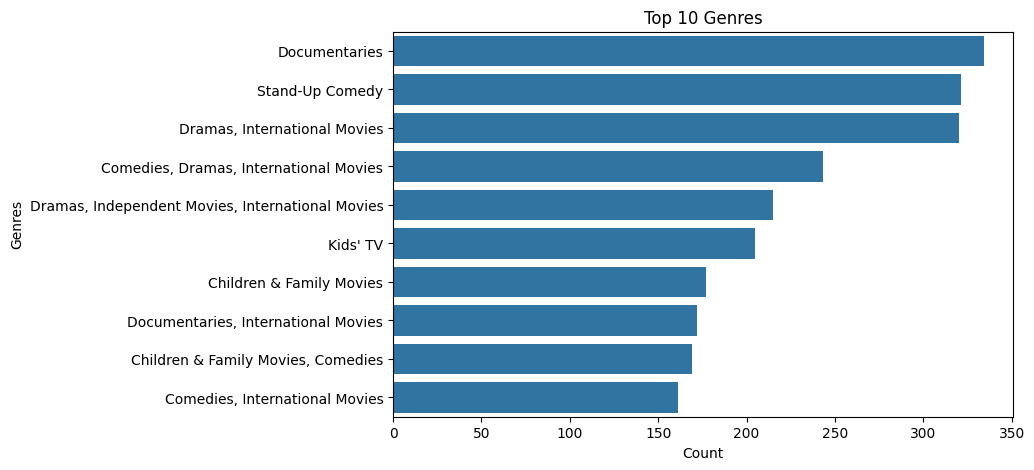

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values , y = top_genres.index )
plt.title('Top 10 Genres')
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

Country Wise Contributions

In [ ]:
top_countries = df['country'].value_counts().head(10)

/tmp/ipython-input-1471508801.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




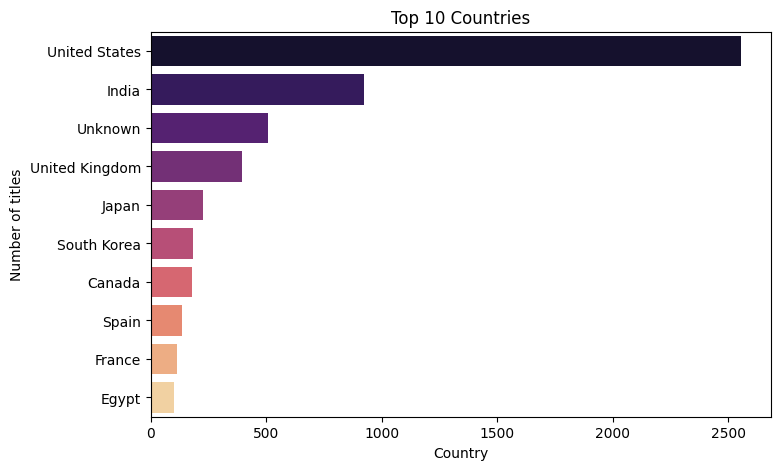

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values , y = top_countries.index , palette = 'magma')
plt.title('Top 10 Countries')
plt.ylabel('Number of titles')
plt.xlabel('Country')
plt.show()

Ratings Distribution

/tmp/ipython-input-3795278327.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




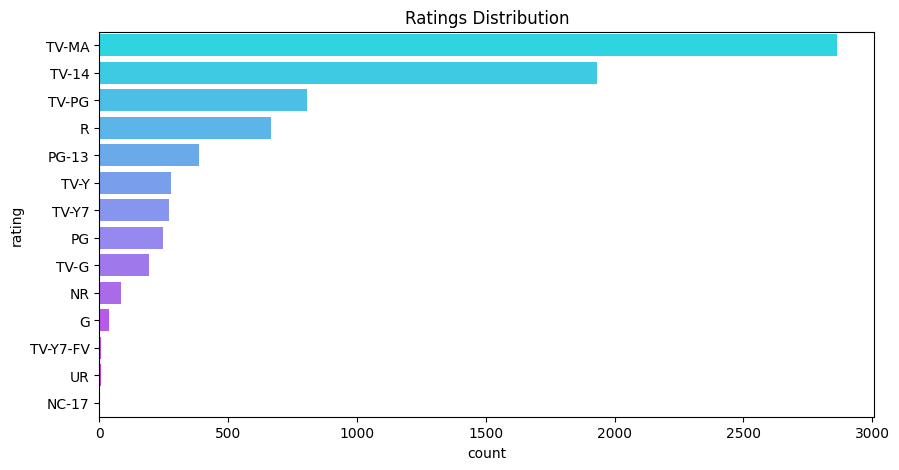

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'rating' , data =df , order = df['rating'].value_counts().index , palette = 'cool')
plt.title('Ratings Distribution')
plt.show()

Duration Insights

In [ ]:
movies = df[df['category'] == 'Movie']

In [ ]:
shows = df[df['category'] == 'TV Show']

In [ ]:
movies['duration_num'] = movies['duration'].str.replace(' min' , '').astype('float')

/tmp/ipython-input-858292925.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



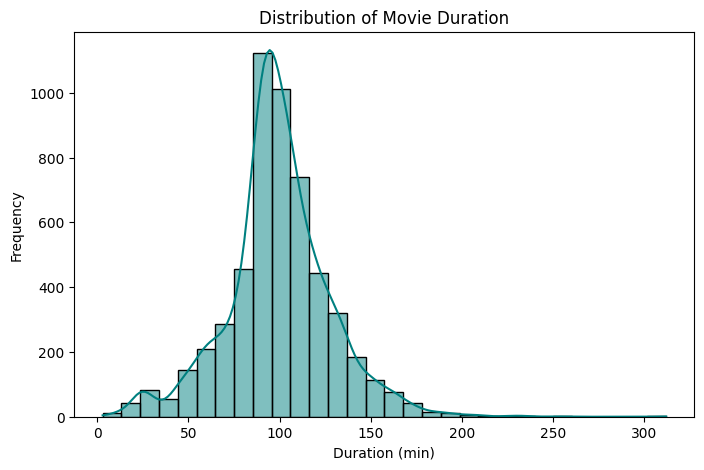

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_num'] , bins = 30 , kde = True , color = 'Teal')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

Yearly Genre Trend

In [ ]:
genre_trend = df.groupby(['year' , 'type']).size().reset_index(name='count')
px.area(genre_trend , x='year' , y='count' , color = 'type' , title = 'Yearly genre Trend')

Key Insights

In [ ]:
print('Total titles: ' , len(df))

Total titles:  7789


In [ ]:
print('Movies: ' , (df['category'] == 'Movie').sum())

Movies:  5379


In [ ]:
print('TV Shows: ' , (df['category'] == 'TV Show').sum())

TV Shows:  2410


In [ ]:
print("Most common Genre: " , df['type'].mode()[0])

Most common Genre:  Documentaries


In [ ]:
print("Countries with most titles: " , df['country'].mode()[0])

Countries with most titles:  United States
